In [58]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target

# # Selects only the first two features, 0: sepal length, 1: sepal width #
X, y = X_temp[:, [0,1]], y_temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    
# # standard scaling #
# # StandardScaler() creates a scaler object; and fit(X_train) calculates the mean and standard deviation of each feature #
scaler = preprocessing.StandardScaler().fit(X_train)

# # applies the standardization. scaled data = (X - μ) / σ = (value - mean) / standard deviation #
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# # each feature mean will 0 and standard deviation will 1 #

In [59]:
import numpy as np
print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))

Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


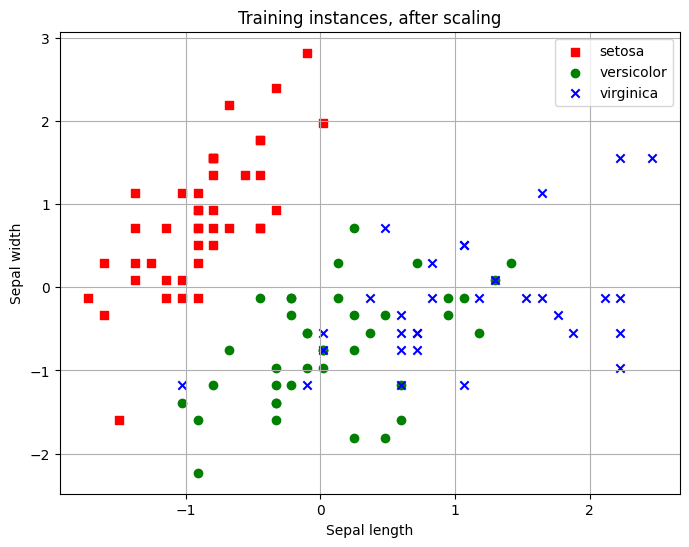

In [60]:
import matplotlib.pyplot as plt

plt.figure('Training Data', figsize=(8, 6))

colour_marker = [ ['red','s'], ['green','o'], ['blue','x']]

for i in range(len(colour_marker)):
    xs = X_train[:, 0][y_train == i] # Sepal length
    ys = X_train[:, 1][y_train == i] # Sepal width
    plt.scatter(xs, ys, c=colour_marker[i][0], marker=colour_marker[i][1])

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()
plt.show()

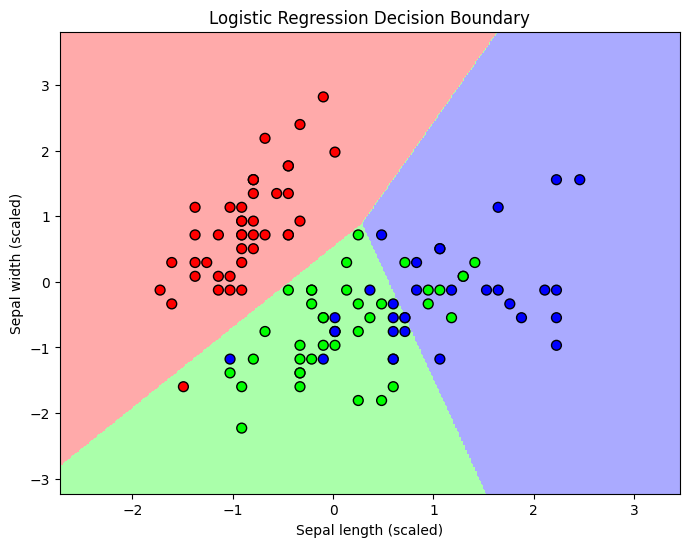

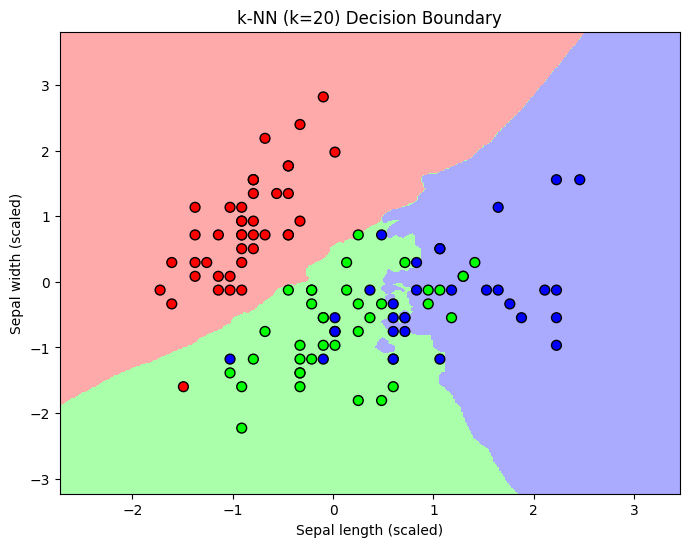

In [61]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title):
    h = .02 # step size

    # # -1 from min, +1 to max for plot gets a margin #
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # # np.arange = creates array (start, stop, step) #
    # # meshgrid = create a 2D grid of coordinates from two 1D arrays #
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
                     
    # # .ravel() = flattens (1D) a NumPy array #
    # # np.c_() = combines arrays as columns #
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Sepal width (scaled)")
    plt.title(title)
    plt.show()

# # plot diagram #
plot_decision_boundary(log_reg, X_train, y_train, "Logistic Regression Decision Boundary")
plot_decision_boundary(knn, X_train, y_train, "k-NN (k=20) Decision Boundary")



In [62]:
# # binary classification; setosa or not #
import copy
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# # binary classification: 0 if setosa, otherwise 1 #
y_train_setosa = copy.copy(y_train) 
y_train_setosa[y_train_setosa > 0]=1

y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1

# # log_loss for binary classification, especially with predict probabilities #
clf = SGDClassifier(loss='log_loss', random_state=42)
clf.fit(X_train, y_train_setosa)

'''
Logistic regression first computes a linear combination of inputs:
z = w1*x1 + w2*x2 + w3*x3 + ..... + wn*xn + b

Or in vector notation:
z = w^T * x + b

Which is the same structure as:
y = mx + c

m corresponds to your w_i (weights or clf.coef_)
c is the intercept (clf.intercept_)
x is your input feature(s)

z is a linear score, not yet a probability
clf.coef_: An array of weights (coefficients) for each feature, indicating how strongly each feature affects the prediction.

clf.intercept_: The bias term (intercept) in the logistic regression equation.
'''
print(clf.coef_,clf.intercept_)

y_pred = clf.predict(X_test)

print(classification_report(y_test_setosa, y_pred, target_names=["Setosa", "Not Setosa"]))

[[ 21.76180381 -10.51985217]] [13.90763024]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Not Setosa       1.00      1.00      1.00        30

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



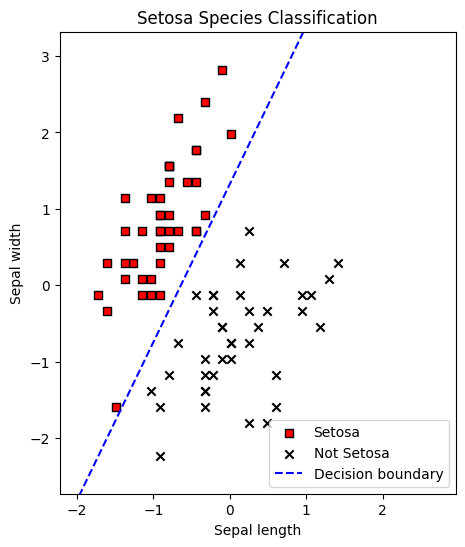

In [63]:
# fix boundary for decision boundary plot
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

xs = np.arange(x_min, x_max, 0.5)
# # w1​*x + w2​*y + b = 0 #
ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1]

# draw graph
fig, axes = plt.subplots(figsize=(10, 6))
axes.set_aspect('equal')
axes.set_title('Setosa Species Classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)
plt.sca(axes)

# data point plot
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s', label='Setosa', edgecolor='k')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x', label='Not Setosa')

# decision boundary
plt.plot(xs, ys, color='blue', linestyle='--', label='Decision boundary')
plt.legend()
plt.show()


In [64]:
print ('If the flower has 4.6 petal width and 3.2 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))


If the flower has 4.6 petal width and 3.2 petal length is a ['setosa']


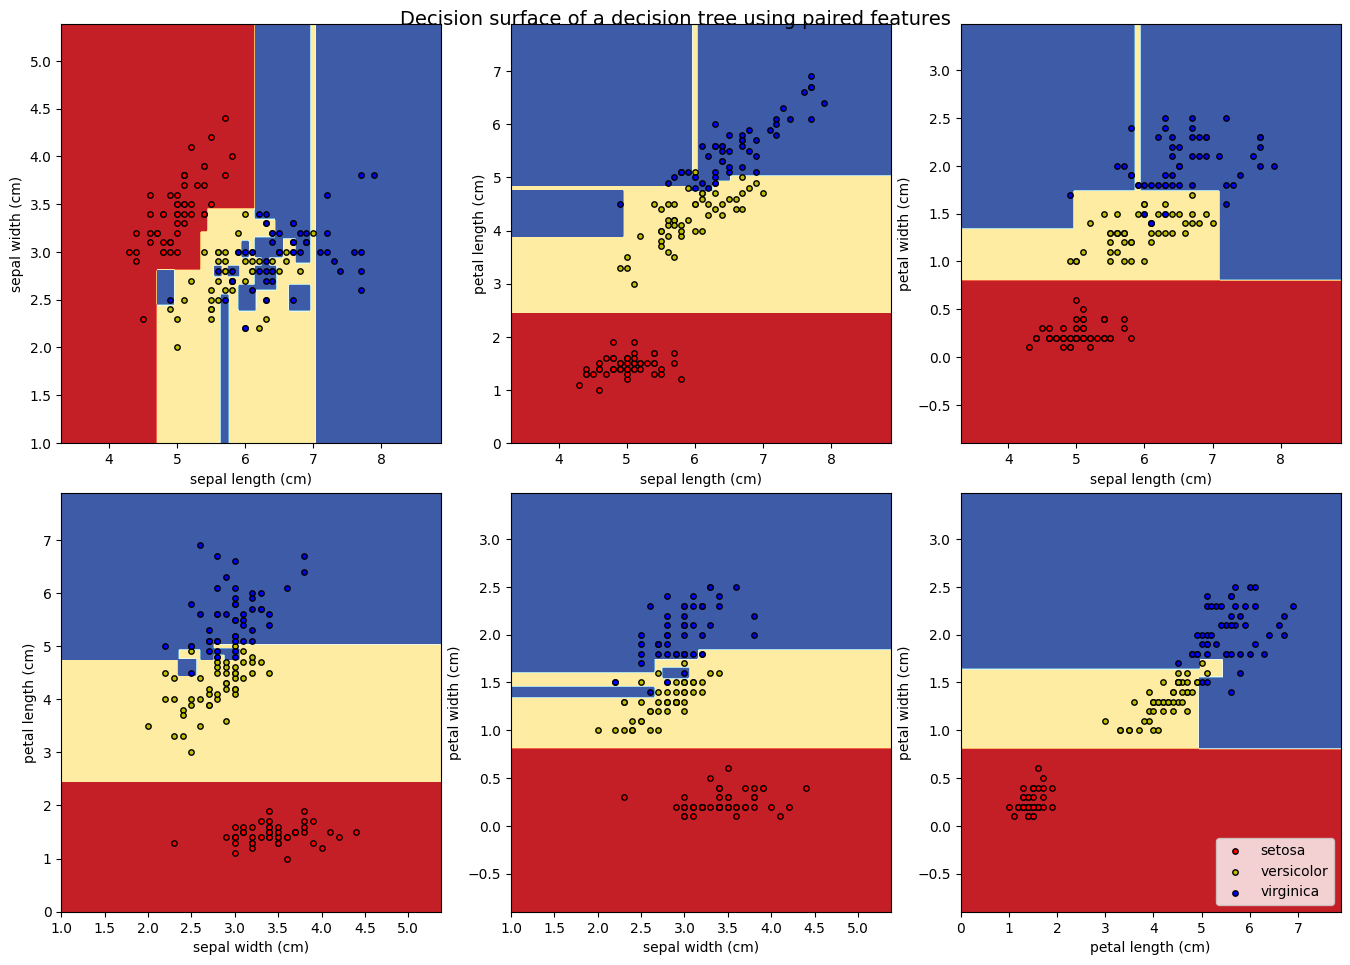

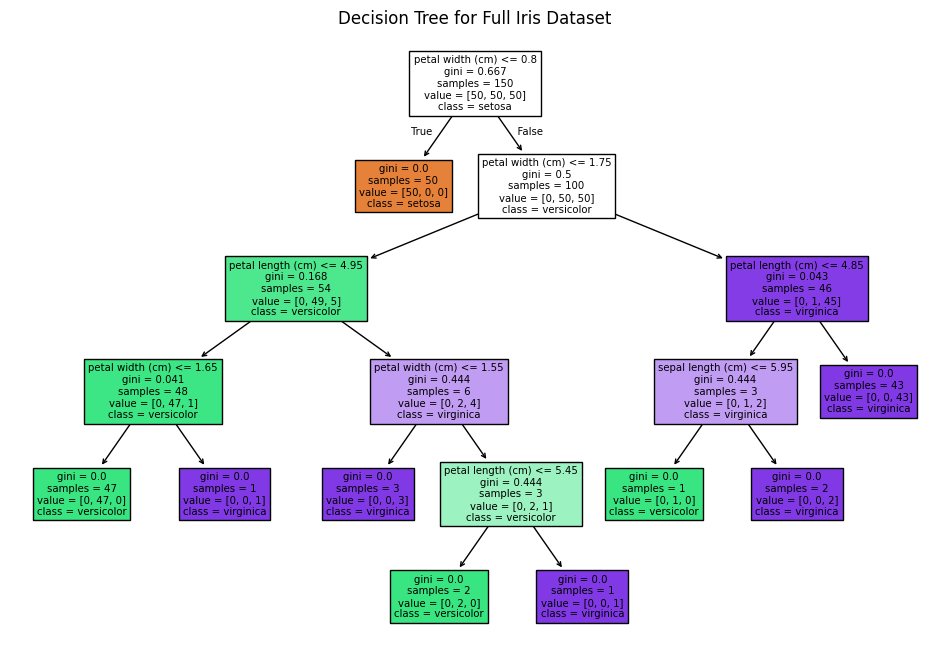

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# # Parameters #
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(14, 10))

# # Loop through all pairs of features #
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # # training #
    clf = DecisionTreeClassifier().fit(X, y)

    # # Add subplot #
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # # Plot training points #
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    edgecolor='black', s=15)

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

# # Avoid multiple legends #
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right')

plt.suptitle("Decision surface of a decision tree using paired features", fontsize=14)
plt.show()

# # Plot the full decision tree using all features #
plt.figure(figsize=(12, 8))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Full Iris Dataset")
plt.show()
